> Welcome to the project! You will find tips in quoted sections like this to help organize your approach to your investigation.

# Project: Investigate a Pima Indians Diabetes Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Prediction analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.svm import SVC
from scipy import stats






<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# all attributes are int or float 


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# No Null values in our dataset 

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [9]:
(df == 0).sum(axis=0)


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

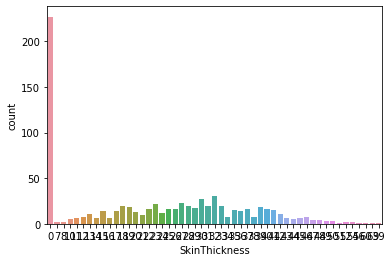

In [10]:
sns.countplot(df['SkinThickness'])
plt.show()

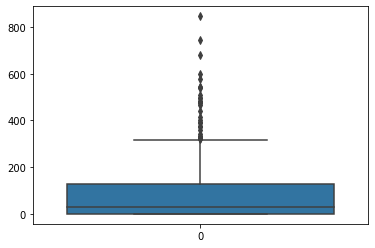

In [11]:
sns.boxplot(data=df['Insulin'])
plt.show()

# its okay to have zero in number of  Pregnancies but it is not logic to have zeros in blood pressure or Insulin level or skin thickness

In [12]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())



In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
#df['Insulin']=df['Insulin'].replace([0,'0'],np.nan)
#df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
#df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

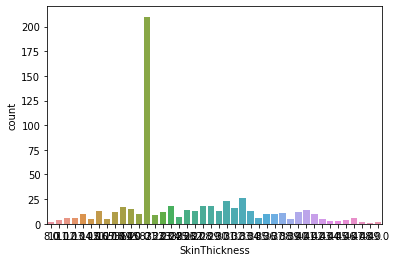

In [14]:
sns.countplot(df['SkinThickness'])
plt.show()

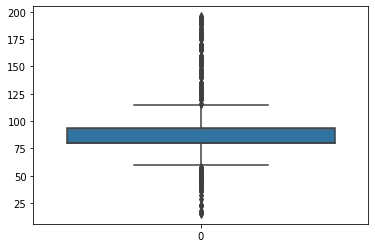

In [15]:
sns.boxplot(data=df['Insulin'])
plt.show()

In [16]:
(df == 0).sum(axis=0)


Pregnancies                  85
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     426
dtype: int64

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df['Outcome'].value_counts()

0    426
1    193
Name: Outcome, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 find strong relation between attributes 

In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.143813,0.210402,0.077719,-0.001441,0.059925,0.015890,0.551053,0.208819
Glucose,0.143813,1.000000,0.236856,0.045846,0.290667,0.171539,0.060247,0.295338,0.494754
BloodPressure,0.210402,0.236856,1.000000,0.112872,-0.015534,0.260099,0.019233,0.359794,0.181881
SkinThickness,0.077719,0.045846,0.112872,1.000000,0.240437,0.499103,0.095482,0.039292,0.121601
Insulin,-0.001441,0.290667,-0.015534,0.240437,1.000000,0.139275,0.163515,0.065311,0.160138
BMI,0.059925,0.171539,0.260099,0.499103,0.139275,1.000000,0.122221,0.070286,0.286779
DiabetesPedigreeFunction,0.015890,0.060247,0.019233,0.095482,0.163515,0.122221,1.000000,0.024498,0.177168
Age,0.551053,0.295338,0.359794,0.039292,0.065311,0.070286,0.024498,1.000000,0.249950
Outcome,0.208819,0.494754,0.181881,0.121601,0.160138,0.286779,0.177168,0.249950,1.000000


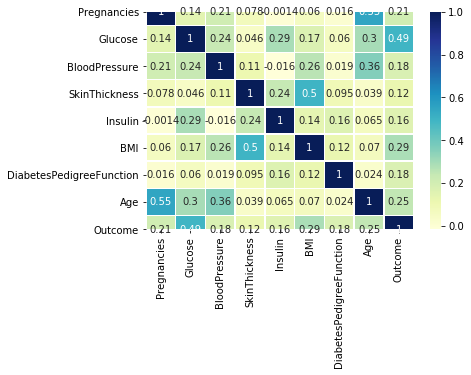

In [20]:

sns.heatmap(df.corr(), annot=True,linewidths=.5,cmap="YlGnBu")

#  we see that there is no strong colleration between two atrributes the max was 0.5 which we could not consider very strong

### Research Question 2  Studying distribuation of data


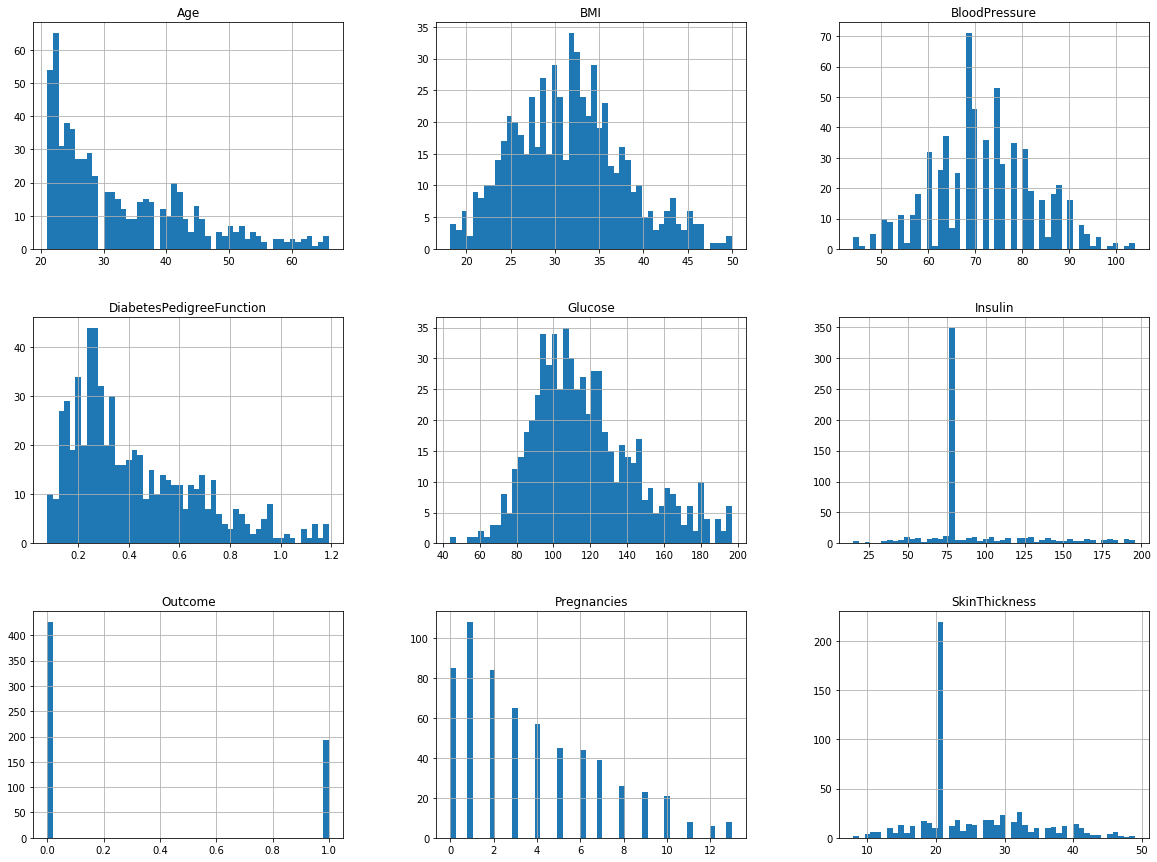

In [21]:
df.hist(bins=50, figsize=(20, 15))
plt.show()



Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

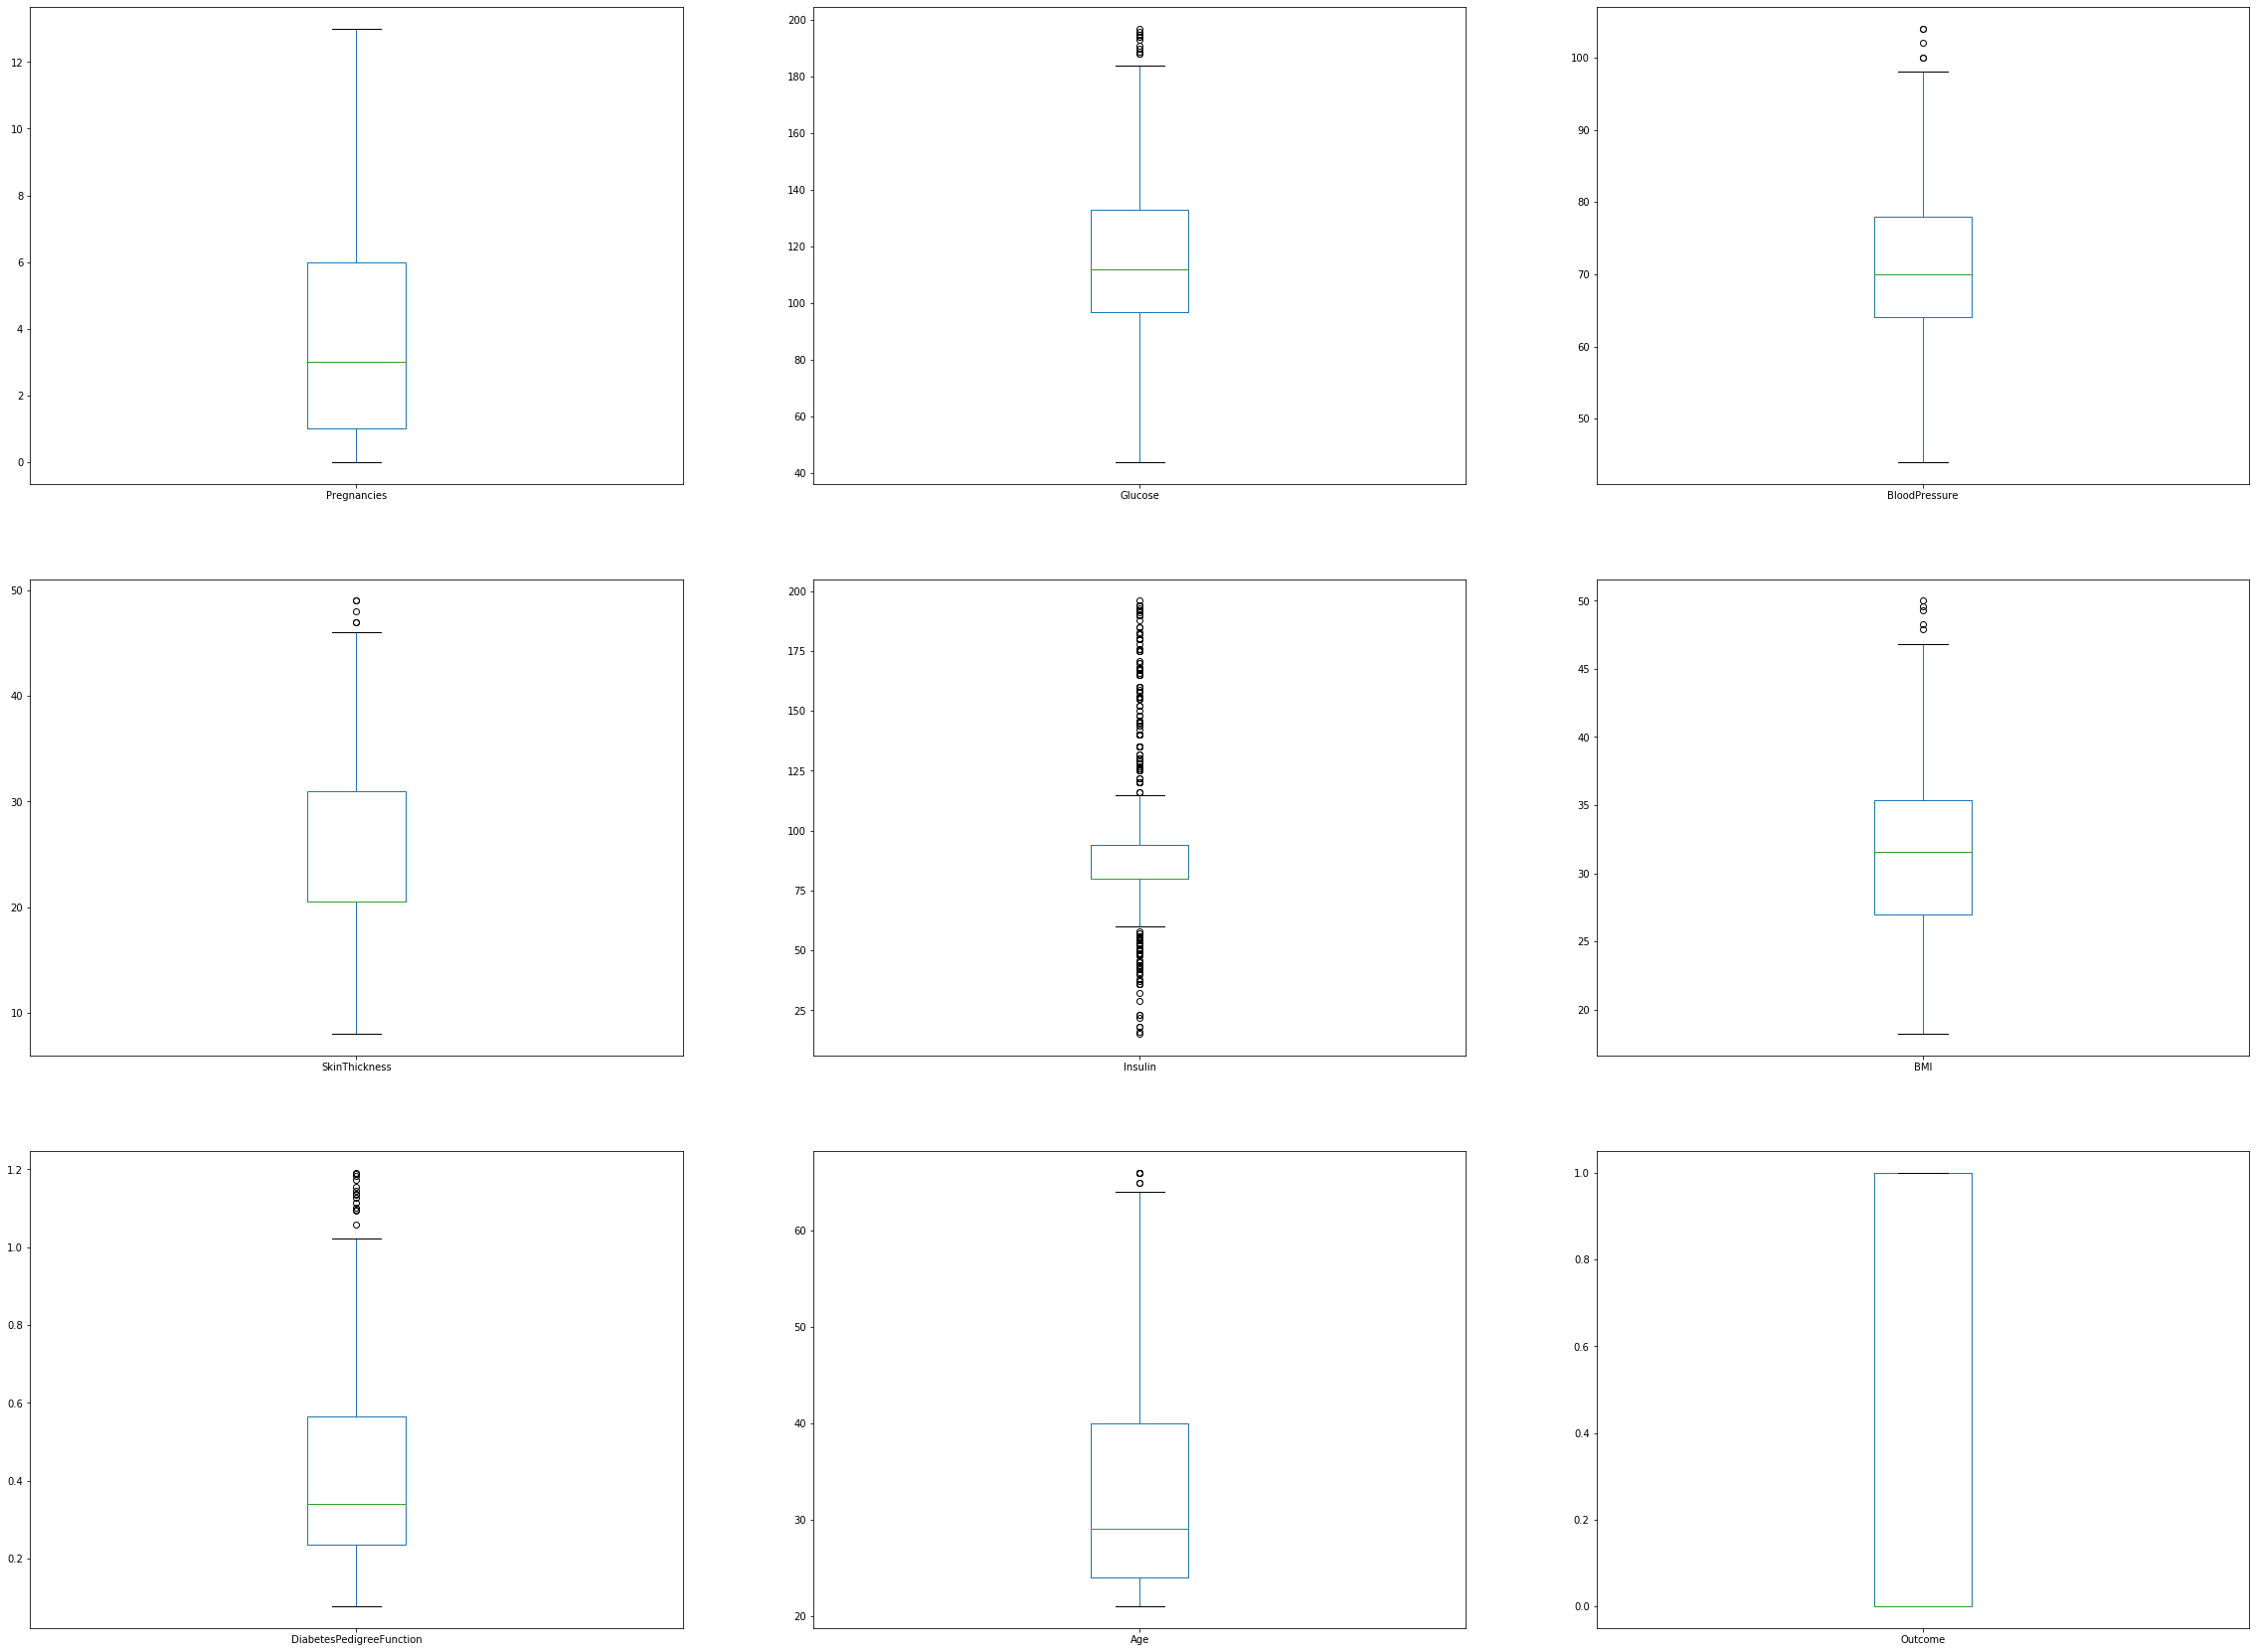

In [22]:
df.plot(kind= 'box' ,subplots=True,layout=(3,3), figsize=(40,30))


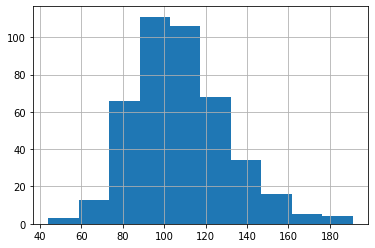

In [41]:
df.loc[df['Outcome']==0,'Glucose'].hist()

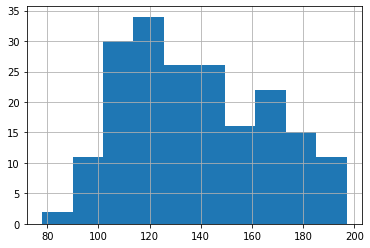

In [42]:
df.loc[df['Outcome']==1,'Glucose'].hist()

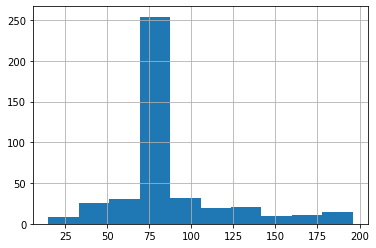

In [43]:
df.loc[df['Outcome']==0,'Insulin'].hist()

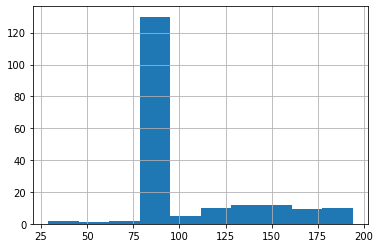

In [44]:
df.loc[df['Outcome']==1,'Insulin'].hist()

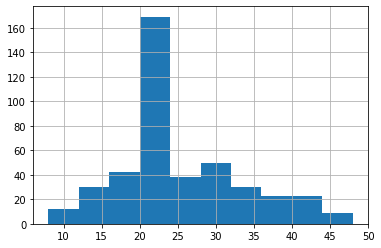

In [45]:
df.loc[df['Outcome']==0,'SkinThickness'].hist()

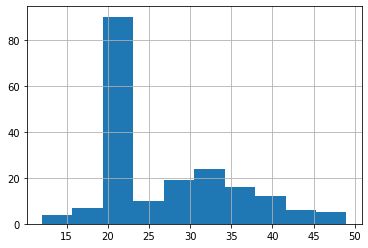

In [46]:
df.loc[df['Outcome']==1,'SkinThickness'].hist()

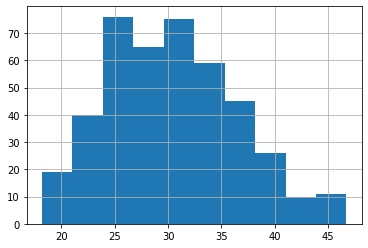

In [47]:
df.loc[df['Outcome']==0,'BMI'].hist()

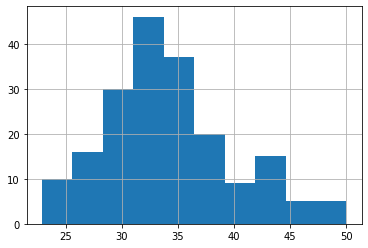

In [48]:
df.loc[df['Outcome']==1,'BMI'].hist()

> **Note: if you have more questions and insights don't hesitate to do it**

<a id='pre'></a>
## Build a Prediction Model


In [23]:
# Make a feature scaling
scaler=StandardScaler()
scaler.fit(df.drop(['Outcome'],axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_features=scaler.transform(df.drop(['Outcome'],axis=1))

In [25]:
df_scaled=pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.682617,1.091755,0.034304,1.189648,-0.351118,0.329102,0.860923,1.594932
1,-0.866283,-1.149453,-0.513625,0.457568,-0.351118,-0.795445,-0.267148,-0.136788
2,1.302178,2.336871,-0.696268,-0.575096,-0.351118,-1.325588,1.044848,-0.045645
3,-0.866283,-1.007154,-0.513625,-0.274511,0.069635,-0.554470,-1.019195,-1.048220
4,0.372837,-0.046636,0.216947,-0.575096,-0.351118,-0.956094,-0.880230,-0.227932


In [26]:
df_scaled.mean(axis=0)


Pregnancies                -5.129625e-17
Glucose                     3.981737e-17
BloodPressure               3.022174e-17
SkinThickness              -2.467959e-16
Insulin                     8.411868e-17
BMI                         3.657548e-16
DiabetesPedigreeFunction    2.653594e-16
Age                         2.471547e-16
dtype: float64

In [27]:
df_scaled.std(axis=0)

Pregnancies                 1.000809
Glucose                     1.000809
BloodPressure               1.000809
SkinThickness               1.000809
Insulin                     1.000809
BMI                         1.000809
DiabetesPedigreeFunction    1.000809
Age                         1.000809
dtype: float64

# we succeed in making our mean equal to zero also our std equal to 1 

In [28]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(df_scaled,df['Outcome'], test_size=0.30, random_state=42)


## Compare the performance (Confusion matrix and classification report) of different classifiers (LR, KNN, SVM, DT and RF)

> **Note: use grid search with a suitable range of values to adjust the hyperparameters of DT and SVM and for loop to adjust the k value of KNN**

# Logistic Regression 

In [29]:
print(X_train)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
409    -0.556503 -1.185028      -1.974768      -0.274511 -0.463695 -0.184976   
434    -0.246723  0.415835       1.860732       2.897834  1.877031  0.778921   
33      0.992398 -0.402384       1.860732      -0.884578 -0.351118 -1.421978   
0       0.682617  1.091755       0.034304       1.189648 -0.351118  0.329102   
612     1.611958  1.874399       0.216947       0.701595 -0.351118  1.999858   
..           ...       ...            ...            ...       ...       ...   
71      0.063057  0.202387       0.764875      -1.250618  2.499250  0.072063   
106    -0.556503  0.273536      -1.061553      -0.640551  1.432590  0.361232   
270    -0.866283 -0.793706       0.216947      -0.518538 -0.552583 -0.907899   
435    -0.246723  0.380260       0.034304      -0.030485  2.914062  0.136323   
102     0.063057  1.981123      -0.148339      -1.372631  2.262214 -0.297431   

     DiabetesPedigreeFunction       Age

In [31]:
lgm = LogisticRegression()
lgm.fit(X_train,y_train)

C:\Users\Arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = lgm.predict(X_test)


In [33]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87       133
           1       0.67      0.68      0.67        53

    accuracy                           0.81       186
   macro avg       0.77      0.77      0.77       186
weighted avg       0.81      0.81      0.81       186



# Using KNN


In [34]:
knn = KNeighborsClassifier(n_neighbors=1)


In [35]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [36]:
pred =knn.predict(X_test)


In [37]:
print(confusion_matrix(y_test,pred))


[[103  30]
 [ 30  23]]


In [38]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.77      0.77      0.77       133
           1       0.43      0.43      0.43        53

    accuracy                           0.68       186
   macro avg       0.60      0.60      0.60       186
weighted avg       0.68      0.68      0.68       186



#  Choosing a K Value

In [39]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

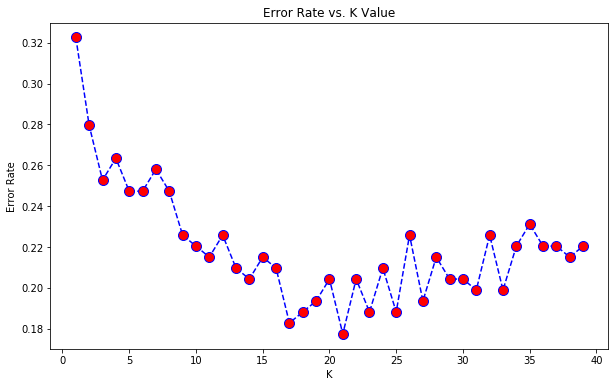

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(n_neighbors=20)


In [42]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [43]:
pred =knn.predict(X_test)


In [44]:
print(confusion_matrix(y_test,pred))


[[124   9]
 [ 29  24]]


In [45]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.81      0.93      0.87       133
           1       0.73      0.45      0.56        53

    accuracy                           0.80       186
   macro avg       0.77      0.69      0.71       186
weighted avg       0.79      0.80      0.78       186



#  using DT

In [69]:
clf = DecisionTreeClassifier()


In [70]:
clf = clf.fit(X_train,y_train)


In [71]:
y_pred = clf.predict(X_test)

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7419354838709677


In [73]:
dt=DecisionTreeClassifier(random_state = 1)
kf=KFold(n_splits=5,shuffle=False)
param_grid = {'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10], 'criterion':['gini','entropy']}

In [74]:
g_search = GridSearchCV(dt, param_grid = param_grid,cv =kf, n_jobs = -1, verbose = 1, scoring='accuracy')

In [75]:
g_search.fit(X_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.1s finished
C:\Users\Arabtech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
g_search.best_score_

0.7344110854503464

In [77]:
bestHP=g_search.best_params_
print(bestHP)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [78]:
dtb = DecisionTreeClassifier(max_depth= 5, min_samples_split= 10)
dtb = dtb.fit(X_train,y_train)
y_pred_best = dtb.predict(X_test)

In [79]:
print(classification_report(y_test,y_pred_best))


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       133
           1       0.59      0.60      0.60        53

    accuracy                           0.77       186
   macro avg       0.72      0.72      0.72       186
weighted avg       0.77      0.77      0.77       186



In [80]:
print(confusion_matrix(y_test,y_pred_best))


[[111  22]
 [ 21  32]]


# Hyper paramters for RF 

In [60]:
rf=RandomForestClassifier()


In [61]:
rf.fit(X_train,y_train)


C:\Users\Arabtech\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
y_pred=rf.predict(X_test)


In [63]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       133
           1       0.62      0.49      0.55        53

    accuracy                           0.77       186
   macro avg       0.72      0.69      0.70       186
weighted avg       0.76      0.77      0.76       186



In [64]:
rf=RandomForestClassifier(random_state = 1)
kf=KFold(n_splits=5,shuffle=False)
param_grid = {'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'n_estimators':[75,100,150,200], 'max_features': ['auto', 'log2']}

In [65]:
g_search = GridSearchCV(rf, param_grid = param_grid,cv =kf, n_jobs = -1, verbose = 1, scoring='accuracy')

In [66]:
g_search.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   36.0s finished


In [67]:
bestHP=g_search.best_params_
print(bestHP)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 75}


In [68]:
g_search.best_score_

0.7736720554272517

In [55]:
bestrf=RandomForestClassifier(max_depth= 10, max_features= 'auto', min_samples_split= 2, n_estimators= 75)

In [56]:
bestrf=bestrf.fit(X_train,y_train)

In [57]:
y_pred_best = bestrf.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred_best))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85       133
           1       0.62      0.55      0.58        53

    accuracy                           0.77       186
   macro avg       0.72      0.71      0.71       186
weighted avg       0.77      0.77      0.77       186



In [59]:
print(confusion_matrix(y_test,y_pred_best))


[[115  18]
 [ 24  29]]


#  Svm

In [81]:
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

C:\Users\Arabtech\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [82]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88       133
           1       0.71      0.60      0.65        53

    accuracy                           0.82       186
   macro avg       0.78      0.75      0.76       186
weighted avg       0.81      0.82      0.81       186

[[120  13]
 [ 21  32]]


In [88]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf','linear']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)  
grid.fit(X_train, y_train)

C:\Users\Arabtech\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.9s finished
C:\Users\Arabtech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [89]:
print(grid.best_params_)


{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [90]:
print(grid.best_estimator_)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [93]:
svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

In [94]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       133
           1       0.70      0.66      0.68        53

    accuracy                           0.82       186
   macro avg       0.78      0.77      0.78       186
weighted avg       0.82      0.82      0.82       186

[[118  15]
 [ 18  35]]


<a id='conclusions'></a>
## Conclusions
The dataset had small numbers of tupiles with no Null value and many zero values which I replaced it with the mean I also tried to replace it with the median there was no difference in accuracy of the models.I removed the outlairs after that which really increased the accuracy of my model .I also tried to interpolate the data but it weakens the strong collrotional feature of my data 
we see that 35% of data 1 and 65% of my data is 0 thats made our model detect the zero outcome very good but not much good in detecting 1

 
